In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
pd.set_option('display.max_rows', None)
import re
from pathlib import Path
import plotly.express as px
from course_id_mapping import course_ids_dictionary

In [41]:
all_cleaned_path = Path("author_mentions")

# Initialize an empty list to store the data
data = []

# Iterate over each file in the folder and its subdirectories
for file_path in all_cleaned_path.glob("**/*.json"):
    if file_path.is_file():

        # Read the JSON file into a DataFrame
        df = pd.read_json(file_path)
        print(f"Successfully read in {file_path}.")
        course_id = file_path.stem[:7]
        
        # Add a column for course_id
        df['canvas_course_id'] = course_id

        # Append the DataFrame to the data list
        data.append(df)

# Concatenate all the DataFrames into a single DataFrame
all_together = pd.concat(data, ignore_index=True)

# Print the final DataFrame
print(all_together.columns)

Successfully read in author_mentions\main_posts\1149116_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1150006_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1154406_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1155902_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1158756_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1160142_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1163902_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1166460_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1171836_author_mentions_main_posts.json.
Successfully read in author_mentions\main_posts\1174984_author_mentions_main_posts.json.
Successfully read in author_mentions\reply_posts\1149116_author_mentions_reply_posts.json.
Successfully read i

In [42]:
all_together.head()

,id,user_id,parent_id,created_at,updated_at,rating_count,rating_sum,user_name,message,user,read_state,forced_read_state,discussion_board_id,author_mentions,editor_id,canvas_course_id,attachment,attachments
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,2019-12-13 05:05:22+00:00,NaN,NaN,Emma Brown,<p>When I read foreweird and the introduction ...,"{'id': 3885812, 'anonymous_id': '2bab8', 'disp...",read,False,3526380,"[3, 4]",NaN,1149116,NaN,NaN
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,2019-09-06 13:56:16+00:00,NaN,NaN,Clayton Cash,<p><span>I believe a very notable concept was ...,"{'id': 3878246, 'anonymous_id': '2b4h2', 'disp...",read,False,3526380,"[2, 2]",NaN,1149116,NaN,NaN
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,2019-08-27 17:28:40+00:00,NaN,NaN,Nelesa Oseguera,<p>What interested me the most about week one’...,"{'id': 3881196, 'anonymous_id': '2b6r0', 'disp...",read,False,3526380,"[1, 5, 5, 5, 5]",NaN,1149116,NaN,NaN
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,2019-08-27 17:15:17+00:00,NaN,NaN,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...","{'id': 1612050, 'anonymous_id': 'yjv6', 'displ...",read,False,3526380,[],NaN,1149116,NaN,NaN
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,2019-08-26 04:41:39+00:00,NaN,NaN,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...","{'id': 3880146, 'anonymous_id': '2b5xu', 'disp...",read,False,3526380,[],NaN,1149116,NaN,NaN


In [43]:
all_together.drop(columns=['updated_at', 'rating_count', 'rating_sum', 'read_state', 'forced_read_state', 'editor_id', 'attachment', 'attachments', 'user'], inplace=True)

In [44]:
all_together.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,"[3, 4]",1149116
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,"[2, 2]",1149116
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,"[1, 5, 5, 5, 5]",1149116
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...",3526380,[],1149116
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...",3526380,[],1149116


In [45]:
all_together['canvas_course_id'] = all_together['canvas_course_id'].astype(int)
all_together['semester_year'] = all_together['canvas_course_id'].map(course_ids_dictionary)
all_together.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,"[3, 4]",1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,"[2, 2]",1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,"[1, 5, 5, 5, 5]",1149116,fall_2019
3,18568048,1612050,NaN,2019-08-27 17:15:17+00:00,Kevin Spicer,"<p>As mentioned in my short <a id=""media_comme...",3526380,[],1149116,fall_2019
4,18565190,3880146,NaN,2019-08-26 04:41:39+00:00,Christian Bitangalo,"<p><span style=""font-family: Arial;""><span sty...",3526380,[],1149116,fall_2019


author_mentions
1      35
5      21
124    16
4       9
123     3
3       2
2       1
Name: count, dtype: int64


C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\1390208305.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot: xlabel='author_mentions'>

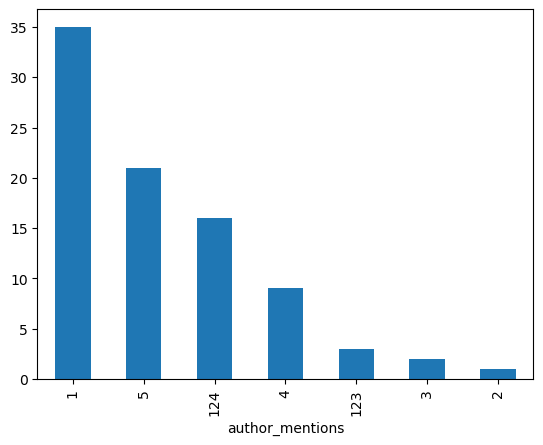

In [46]:
just_fall_2020 = all_together[all_together['semester_year'] == 'fall_2020']
just_fall_2020['author_mentions'] = just_fall_2020['author_mentions'].apply(set)
#print(just_fall_2020.head(15))
just_fall_2020_exploded_df = just_fall_2020.explode('author_mentions')

specific_author_ids = [1, 2, 3, 4, 5, 123, 124]

# Filter the DataFrame based on the specific author_ids
just_fall_2020_exploded_df = just_fall_2020_exploded_df[just_fall_2020_exploded_df['author_mentions'].isin(specific_author_ids)]
print(just_fall_2020_exploded_df.author_mentions.value_counts())
just_fall_2020_exploded_df.author_mentions.value_counts().plot(kind='bar')

In [47]:
just_spring_2023 = all_together[all_together['semester_year'] == 'spring_2023']
just_spring_2023.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
2105,21177456,3908188,NaN,2023-01-12 02:54:36+00:00,Quetzalli Garcia,"<p>Hello everyone, my name is Quetzalli Garcia...",3771490,[],1174984,spring_2023
2106,21175644,3917034,NaN,2023-01-11 22:15:34+00:00,Julia Lara Fleige,<p>Hey everyone! &nbsp;My name is Julia and I ...,3771490,[],1174984,spring_2023
2107,21174476,3915600,NaN,2023-01-11 17:33:29+00:00,Dylan Holtz,"<p>Hello, I am Dylan Holtz. I currently do not...",3771490,[],1174984,spring_2023
2108,21172270,3907764,NaN,2023-01-11 01:18:31+00:00,Maya Willis Policandriotes,<p>My name is Maya Willis. I am majoring in nu...,3771490,[],1174984,spring_2023
2109,21171266,3921600,NaN,2023-01-10 21:49:01+00:00,Rachel Holtz,<p>Good afternoon everyone! My name is Rachel ...,3771490,[],1174984,spring_2023


In [48]:
just_spring_2023['author_mentions'] = just_spring_2023['author_mentions'].apply(set)
just_spring_2023_exploded_df = just_spring_2023.explode('author_mentions')
just_spring_2023_exploded_df.head(25)

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\708031801.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
2105,21177456,3908188,NaN,2023-01-12 02:54:36+00:00,Quetzalli Garcia,"<p>Hello everyone, my name is Quetzalli Garcia...",3771490,NaN,1174984,spring_2023
2106,21175644,3917034,NaN,2023-01-11 22:15:34+00:00,Julia Lara Fleige,<p>Hey everyone! &nbsp;My name is Julia and I ...,3771490,NaN,1174984,spring_2023
2107,21174476,3915600,NaN,2023-01-11 17:33:29+00:00,Dylan Holtz,"<p>Hello, I am Dylan Holtz. I currently do not...",3771490,NaN,1174984,spring_2023
2108,21172270,3907764,NaN,2023-01-11 01:18:31+00:00,Maya Willis Policandriotes,<p>My name is Maya Willis. I am majoring in nu...,3771490,NaN,1174984,spring_2023
2109,21171266,3921600,NaN,2023-01-10 21:49:01+00:00,Rachel Holtz,<p>Good afternoon everyone! My name is Rachel ...,3771490,NaN,1174984,spring_2023
2110,21170618,3916016,NaN,2023-01-10 18:38:21+00:00,Cassi Hemker,"<p>Hello Everyone!</p>\n<p>My name is Cassi, a...",3771490,NaN,1174984,spring_2023
2111,21168964,3915586,NaN,2023-01-10 03:22:39+00:00,Ethan Fleming,"<p>Hello Class. My name is Ethan Fleming, this...",3771490,NaN,1174984,spring_2023
2112,21168876,3918222,NaN,2023-01-10 03:05:55+00:00,Paulesha Brownson,"<p>Hello, I'm Paulesha Brownson. I am in my fr...",3771490,NaN,1174984,spring_2023
2113,21168826,3922678,NaN,2023-01-10 02:56:09+00:00,Maria Garay,<p><span>Hi Class!</span></p>\n<p><span>My nam...,3771490,NaN,1174984,spring_2023
2114,21168048,3918220,NaN,2023-01-10 00:15:15+00:00,Pauline Brownson,Pauline Brownson here; nice to meet you all. I...,3771490,NaN,1174984,spring_2023


In [49]:
specific_author_ids = [1, 2, 3, 4, 5, 123, 124]

# Filter the DataFrame based on the specific author_ids
just_spring_2023_first_week = just_spring_2023_exploded_df[just_spring_2023_exploded_df['author_mentions'].isin(specific_author_ids)]

# Print the filtered DataFrame
just_spring_2023_first_week.head()

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
2121,21192312,3908188,NaN,2023-01-16 05:54:32+00:00,Quetzalli Garcia,<p><span>My first option that I chose to respo...,3771486,1,1174984,spring_2023
2121,21192312,3908188,NaN,2023-01-16 05:54:32+00:00,Quetzalli Garcia,<p><span>My first option that I chose to respo...,3771486,5,1174984,spring_2023
2122,21191844,3915600,NaN,2023-01-16 04:23:04+00:00,Dylan Holtz,<p>After reading a short bit of H.P. Lovecraft...,3771486,1,1174984,spring_2023
2122,21191844,3915600,NaN,2023-01-16 04:23:04+00:00,Dylan Holtz,<p>After reading a short bit of H.P. Lovecraft...,3771486,124,1174984,spring_2023
2123,21191804,3915586,NaN,2023-01-16 04:13:57+00:00,Ethan Fleming,<p><span>I chose to read the “Introduction” in...,3771486,124,1174984,spring_2023


author_mentions
1      32
5      20
124    13
4       7
3       2
123     1
Name: count, dtype: int64


<AxesSubplot: xlabel='author_mentions'>

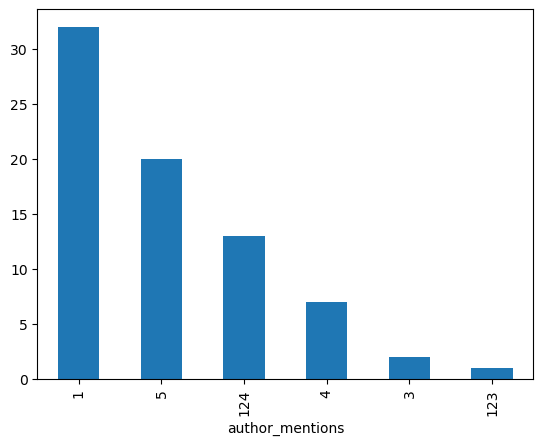

In [50]:
print(just_spring_2023_first_week.author_mentions.value_counts())
just_spring_2023_first_week.author_mentions.value_counts().plot(kind='bar')

In [51]:
all_together_exploded = all_together.explode('author_mentions')
all_together_exploded.dropna(subset=['author_mentions'], inplace=True)
all_together_exploded.head(25)

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,3,1149116,fall_2019
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,4,1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,2,1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,2,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,1,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
5,18565148,3885800,NaN,2019-08-26 04:28:56+00:00,Jazmyn Warner,"<p>""You can't always get what you want, but yo...",3526380,2,1149116,fall_2019


In [52]:
all_together_first_week_filtered = all_together_exploded[all_together_exploded['author_mentions'].isin(specific_author_ids)]

In [53]:
all_together_first_week_filtered.head(20)

,id,user_id,parent_id,created_at,user_name,message,discussion_board_id,author_mentions,canvas_course_id,semester_year
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,3,1149116,fall_2019
0,18813222,3885812,NaN,2019-12-13 05:05:22+00:00,Emma Brown,<p>When I read foreweird and the introduction ...,3526380,4,1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,2,1149116,fall_2019
1,18594230,3878246,NaN,2019-09-06 13:56:16+00:00,Clayton Cash,<p><span>I believe a very notable concept was ...,3526380,2,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,1,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
2,18568066,3881196,NaN,2019-08-27 17:28:40+00:00,Nelesa Oseguera,<p>What interested me the most about week one’...,3526380,5,1149116,fall_2019
5,18565148,3885800,NaN,2019-08-26 04:28:56+00:00,Jazmyn Warner,"<p>""You can't always get what you want, but yo...",3526380,2,1149116,fall_2019


In [54]:
df_grouped = all_together_first_week_filtered.groupby(['created_at', 'discussion_board_id', 'semester_year', 'author_mentions']).size().reset_index(name='count')
author_mentions = df_grouped['author_mentions'].unique()
df_grouped.head(10)

,created_at,discussion_board_id,semester_year,author_mentions,count
0,2019-08-20 02:31:34+00:00,3526348,fall_2019,1,1
1,2019-08-21 23:01:15+00:00,3526380,fall_2019,2,4
2,2019-08-21 23:01:15+00:00,3526380,fall_2019,3,3
3,2019-08-21 23:01:15+00:00,3526380,fall_2019,4,1
4,2019-08-22 00:24:34+00:00,3526380,fall_2019,2,3
5,2019-08-22 01:40:44+00:00,3526380,fall_2019,2,4
6,2019-08-22 21:28:46+00:00,3526380,fall_2019,1,1
7,2019-08-23 17:03:49+00:00,3526380,fall_2019,1,2
8,2019-08-24 00:43:23+00:00,3526380,fall_2019,1,1
9,2019-08-24 00:43:23+00:00,3526380,fall_2019,123,3


In [55]:
import plotly.graph_objects as go
fig = go.Figure()

author_mapping = {
    1: "Lovecraft, Supernatural Horror in Literature",
    2: "Tyson, Critical Theory Today",
    3: "Moorcock, Foreweird",
    4: "VanderMeers, Introduction",
    5: "Freud, The Uncanny",
    123: "Lovecraft, Notes on Writing Weird Fiction",
    124: "Fisher, The Weird and the Eerie"
}

for semester_year in df_grouped['semester_year'].unique():
    data = df_grouped[df_grouped['semester_year'] == semester_year]
    fig.add_trace(go.Bar(x=author_mentions, y=data['count'], name=semester_year))

ticklabels = [author_mapping.get(val, val) for val in author_mentions]
tickvals = author_mentions
ticktext = [author_mapping[val] for val in author_mentions]

fig.update_xaxes(
    type='category',
    categoryarray=author_mentions,
    ticktext=ticklabels,
    tickvals=tickvals,
    title='Author Mentions'
)

fig.update_layout(
    title='Stacked Bar Chart',
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

In [56]:
fig = go.Figure()

for author_mention in df_grouped['author_mentions'].unique():
    data = df_grouped[df_grouped['author_mentions'] == author_mention]
    fig.add_trace(go.Bar(
        x=data['semester_year'],
        y=data['count'],
        name=str(author_mention),
    ))

tickvals = df_grouped['semester_year'].unique()
ticktext = [str(val) for val in tickvals]
semester_year_order = ['fall_2019', 'spring_2020', 'summer_2020', 'fall_2020', 'spring_2021', 'summer_2021', 'fall_2021', 'spring_2022', 'fall_2022', 'spring_2023']

fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=tickvals,
    ticktext=ticktext,
    categoryorder='array',
    categoryarray=semester_year_order,
    title='Semester Year'
)

fig.update_layout(
    title='Stacked Bar Chart',
    width=1200,
    height=500,
    yaxis=dict(title='Count'),
    barmode='stack'
)

fig.show()

In [57]:
fig = go.Figure()

for author_mention in df_grouped['author_mentions'].unique():
    data = df_grouped[df_grouped['author_mentions'] == author_mention]
    author_name = author_mapping.get(author_mention, str(author_mention))
    fig.add_trace(go.Bar(
        x=data['semester_year'],
        y=data['count'],
        name=author_name,
    ))

tickvals = df_grouped['semester_year'].unique()
ticktext = [str(val) for val in tickvals]
semester_year_order = ['fall_2019', 'spring_2020', 'summer_2020', 'fall_2020', 'spring_2021', 'summer_2021', 'fall_2021', 'spring_2022', 'fall_2022', 'spring_2023']

fig.update_xaxes(
    type='category',
    tickmode='array',
    tickvals=tickvals,
    ticktext=ticktext,
    categoryorder='array',
    categoryarray=semester_year_order,
    title='Semester/Year'
)

fig.update_layout(
    title='Plots of Most Popular First-Week Authors by Semester/Year Over Entire Course',
    width=1400,
    height=500,
    yaxis=dict(title='Number of Mentions'),
    barmode='stack'
)

fig.show()
fig.write_html('plots/popular_first_week_authors_by_semester_year_stacked.html')

In [58]:
just_fall_2022 = all_together[all_together['semester_year'] == 'fall_2022']
just_fall_2022['author_mentions'] = just_fall_2022['author_mentions'].apply(set)
#print(just_fall_2022.head(15))
just_fall_2022_exploded_df = just_fall_2022.explode('author_mentions')

specific_author_ids = [1, 2, 3, 4, 5, 123, 124]

# Filter the DataFrame based on the specific author_ids
just_fall_2022_exploded_df = just_fall_2022_exploded_df[just_fall_2022_exploded_df['author_mentions'].isin(specific_author_ids)]
#print(just_fall_2022_exploded_df.head(15))

plotly_df = just_fall_2022_exploded_df[['created_at', 'discussion_board_id', 'author_mentions']]
plotly_df['cumulative_count'] = plotly_df.groupby('author_mentions').cumcount() + 1

plotly_df.head(5)

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\3652304627.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\3652304627.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,created_at,discussion_board_id,author_mentions,cumulative_count
1838,2022-08-29 23:03:32+00:00,3747570,1,1
1838,2022-08-29 23:03:32+00:00,3747570,124,1
1839,2022-08-29 19:17:11+00:00,3747570,1,2
1839,2022-08-29 19:17:11+00:00,3747570,124,2
1840,2022-08-29 18:41:49+00:00,3747570,1,3


In [59]:
# Filter the dataframe by semester_year
just_fall_2022 = all_together[all_together['semester_year'] == 'fall_2022']
just_fall_2022['author_mentions'] = just_fall_2022['author_mentions'].apply(set)

just_fall_2022_exploded_df = just_fall_2022.explode('author_mentions')

specific_author_ids = [1, 2, 3, 4, 5, 123, 124]

# Filter the DataFrame based on the specific author_ids
just_fall_2022_exploded_df = just_fall_2022_exploded_df[just_fall_2022_exploded_df['author_mentions'].isin(specific_author_ids)]

# Select out the two relevant columns, sort the values on 'created_at' column and get the cumulative counts
plotly_df = just_fall_2022_exploded_df[['created_at', 'author_mentions']]
plotly_df = plotly_df.sort_values('created_at')
plotly_df['cumulative_count'] = plotly_df.groupby('author_mentions').cumcount() + 1

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\2899177732.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
fig = go.Figure()

for author_mention in plotly_df['author_mentions'].unique():
    data = plotly_df[plotly_df['author_mentions'] == author_mention]
    author_name = author_mapping.get(author_mention, str(author_mention))
    fig.add_trace(go.Scatter(
        x=data['created_at'],
        y=data['cumulative_count'],
        name=author_name,
        mode='markers',
    ))

    fig.update_layout(
    title_text='Plots of Most Popular First-Week Authors in Fall 2022 (Over the Entire Semester)',
    title_x=0.5,
    width=1400,
    height=500,
    yaxis=dict(title='Number of Mentions')
)

fig.show()

In [62]:
start_time = pd.Timestamp('2022-08-24 00:00:00').tz_localize('UTC')
end_time = pd.Timestamp('2022-09-01 23:59:59').tz_localize('UTC')
due_date = "2022-08-29T04:59:59Z"

# Filter the DataFrame for the desired time frame
fig = go.Figure()

filtered_data_by_time_frame = plotly_df[(plotly_df['created_at'] >= start_time) & (plotly_df['created_at'] <= end_time)]

for author_mention in filtered_data_by_time_frame['author_mentions'].unique():
    data = filtered_data_by_time_frame[filtered_data_by_time_frame['author_mentions'] == author_mention]
    author_name = author_mapping.get(author_mention, str(author_mention))
    fig.add_trace(go.Scatter(
        x=data['created_at'],
        y=data['cumulative_count'],
        name=author_name,
        mode='markers',
    ))

fig.update_layout(
    title_text='Plots of Most Popular First-Week Authors in Fall 2022 with Assignment Due Date',
    title_x=0.5,
    width=1400,
    height=500,
    yaxis=dict(title='Number of Mentions')
)

fig.add_vline(x=due_date, line_width=3, line_dash="dash", line_color="red")
fig.add_annotation(x=due_date, y=45, text="Due Date", showarrow=False, arrowhead=1)

# Set the x-axis and y-axis labels
fig.update_xaxes(title_text='Post Creation Timestamp')
fig.update_yaxes(title_text='Cumulative Count of Author Mentions')

# Show the plot
fig.show()

In [63]:
selected_author_mentions = 1

# Filter the dataframe for the selected author_mentions ID
filtered_data = plotly_df[plotly_df['author_mentions'] == selected_author_mentions]
filtered_data = filtered_data.sort_values('created_at')
filtered_data.sort_values('created_at')
filtered_data['cumulative_count'] = filtered_data.groupby('author_mentions').cumcount() + 1
filtered_data.head(10)

,created_at,author_mentions,cumulative_count
6417,2022-08-27 06:30:33+00:00,1,1
6412,2022-08-27 17:41:03+00:00,1,2
2048,2022-08-27 23:02:16+00:00,1,3
6411,2022-08-27 23:04:58+00:00,1,4
6386,2022-08-28 00:16:36+00:00,1,5
2047,2022-08-28 00:17:09+00:00,1,6
6410,2022-08-28 01:26:16+00:00,1,7
6382,2022-08-28 05:07:00+00:00,1,8
2046,2022-08-28 15:58:24+00:00,1,9
6416,2022-08-28 16:01:21+00:00,1,10


In [64]:
fig = go.Figure()

for author_mention in filtered_data['author_mentions'].unique():
    data = filtered_data[filtered_data['author_mentions'] == author_mention]
    author_name = author_mapping.get(author_mention, str(author_mention))
    fig.add_trace(go.Scatter(
        x=data['created_at'],
        y=data['cumulative_count'],
        name=author_name,
        mode='markers',
    ))

fig.update_layout(
    title_text= "Charting Mentions of H.P. Lovecraft's \"Supernatural Horror in Literature\" in Fall 2022 (Over the Entire Semester)",
    title_x=0.5,
    width=1000,
    height=500,
    yaxis=dict(title='Number of Mentions')
)
fig.show()

In [76]:

from plotly.subplots import make_subplots

semester_year_list = ['fall_2019', 'spring_2020', 'summer_2020', 'fall_2020',
       'spring_2021', 'summer_2021', 'fall_2021', 'spring_2022',
       'fall_2022', 'spring_2023']

num_rows = 2
num_cols = 5
fig = make_subplots(rows=num_rows, cols=num_cols, shared_xaxes=False, vertical_spacing=0.1)

for i, semester_year in enumerate(semester_year_list):
    row = i // num_cols + 1  # Calculate the row index
    col = i % num_cols + 1  # Calculate the column index

    # Filter the dataframe by semester_year
    just_semester_year = all_together[all_together['semester_year'] == semester_year]
    just_semester_year['author_mentions'] = just_semester_year['author_mentions'].apply(set)

    just_semester_year_exploded_df = just_semester_year.explode('author_mentions')

    specific_author_ids = [1, 2, 3, 4, 5, 123, 124]

    # Filter the DataFrame based on the specific author_ids
    just_semester_year_exploded_df = just_semester_year_exploded_df[just_semester_year_exploded_df['author_mentions'].isin(specific_author_ids)]

    # Select out the two relevant columns, sort the values on 'created_at' column and get the cumulative counts
    plotly_df = just_semester_year_exploded_df[['created_at', 'author_mentions']]
    plotly_df = plotly_df.sort_values('created_at')
    plotly_df['cumulative_count'] = plotly_df.groupby('author_mentions').cumcount() + 1

    show_legend = i == 0

    for author_mention in plotly_df['author_mentions'].unique():
        data = plotly_df[plotly_df['author_mentions'] == author_mention]
        author_name = author_mapping.get(author_mention, str(author_mention))
        fig.add_trace(go.Scatter(
            x=data['created_at'],
            y=data['cumulative_count'],
            name=author_name,
            mode='markers',
            showlegend=show_legend
        ), row=row, col=col)

fig.update_layout(
    title_text='Plots of Most Popular First-Week Authors (Over the Entire Semester)',
    title_x=0.5,
    width=1400,
    height=1000,  # Adjust the height as per your preference
    yaxis=dict(title='Number of Mentions'),
    showlegend=True
)

fig.show()
fig.write_html(r"G:\My Drive\DHStuff\projects\weird_fiction_from_scratch\plots\all_theoretical_author_mentions_over_time.html")

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\2510125010.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\2510125010.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_23324\2510125010.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [65]:
# Define the start and end timestamps for the desired time frame
start_time = pd.Timestamp('2022-08-24 00:00:00').tz_localize('UTC')
end_time = pd.Timestamp('2022-09-01 23:59:59').tz_localize('UTC')
due_date = "2022-08-29T04:59:59Z"
due_date_arrow = "2022-08-29T03:45:01Z"

# Filter the DataFrame for the desired time frame
filtered_data_by_time_frame = filtered_data[(filtered_data['created_at'] >= start_time) & (filtered_data['created_at'] <= end_time)]

# Create the scatter plot
fig = go.Figure()

# Add the scatter trace
fig.add_trace(go.Scatter(
    x=filtered_data_by_time_frame['created_at'],
    y=filtered_data_by_time_frame['cumulative_count'],
    mode='markers'
))

fig.update_traces(marker=dict(color='mediumorchid'))

fig.add_vline(x=due_date, line_width=3, line_dash="dash", line_color="red")
fig.add_annotation(x=due_date, y=45, text="Due Date", showarrow=False, arrowhead=1)

fig.update_layout(
    title_text= "Charting Mentions of H.P. Lovecraft's \"Supernatural Horror in Literature\" in Fall 2022 (Over the Entire Semester)",
    title_x=0.5,
    width=1000,
    height=500,
    yaxis=dict(title='Number of Mentions')
)
# Set the x-axis and y-axis labels
fig.update_xaxes(title_text='Timestamp')
fig.update_yaxes(title_text='Cumulative Count')

# Show the plot
fig.show()